In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Collection of Data

In [8]:
import os

path=os.listdir("dataset/Training/")
classes={'no_tumor':0 , 'pituitary_tumor':1 , 'meningioma_tumor':2 , 'glioma_tumor':3}

In [9]:
import cv2
X=[]
Y=[]
for cls in classes:
    pth='dataset/Training/'+cls
    for j in os.listdir(pth):
        img=cv2.imread(pth+'/'+j,0)
        img=cv2.resize(img,(200,200))
        X.append(img)               #image of all the directories inside that path
        Y.append(classes[cls])      #corresponding label

In [10]:
X=np.array(X)
Y=np.array(Y)
X_updated=X.reshape(len(X),-1)      #to match model input requirements(2D array)

In [11]:
np.unique(Y)        #sort in ascending order and remove duplicates

array([0, 1, 2, 3])

In [12]:
pd.Series(Y).value_counts()     #no. of unique elements in that file

1    827
3    826
2    822
0    395
dtype: int64

In [13]:
X.shape , X_updated.shape

((2870, 200, 200), (2870, 40000))

Visualization

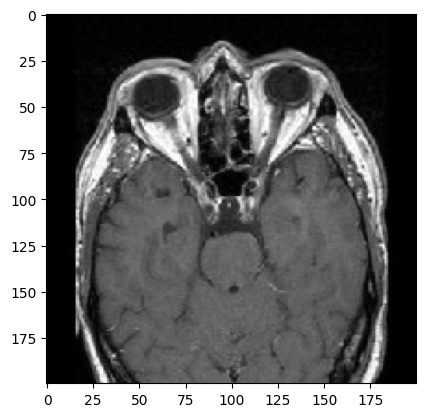

In [14]:
plt.imshow(X[0],cmap='gray')

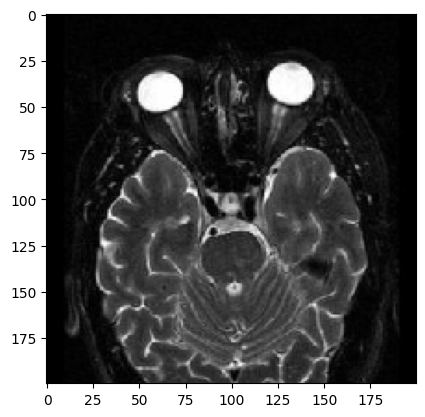

In [15]:
plt.imshow(X[1],cmap='gray')

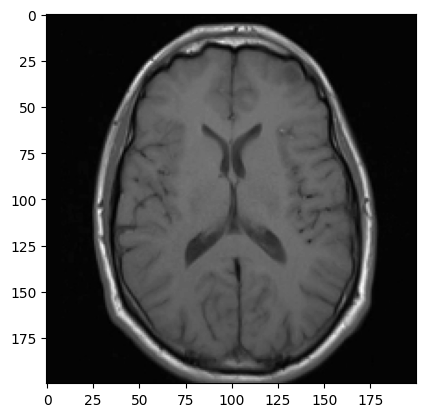

In [48]:
plt.imshow(X[2],cmap='gray')

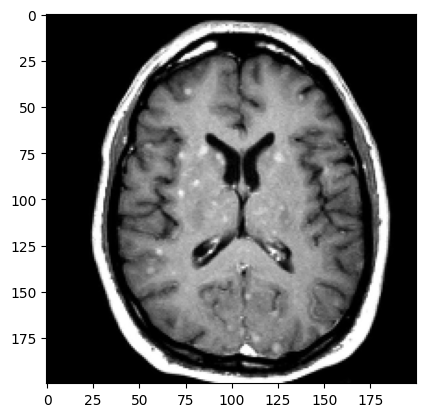

In [49]:
plt.imshow(X[3],cmap='gray')

In [16]:
X_updated.shape

(2870, 40000)

Splitting of Data

In [17]:
xtrain,xtest, ytrain , ytest=train_test_split(X_updated,Y,random_state=10,test_size=.10)
xtrain.shape , xtest.shape

((2583, 40000), (287, 40000))

In [18]:
print(xtrain.max(),xtrain.min())
print(xtest.max(),xtest.min())
xtrain=xtrain/255           #normalization to keep it bw 0 and 1
xtest=xtest/255
print(xtrain.max(),xtrain.min())
print(xtest.max(),xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


PCA (Principal Component Analysis)  Dimesionality Reduction

In [19]:
from sklearn.decomposition import PCA

In [20]:
print(xtrain.shape , xtest.shape)
pca=PCA(0.98)                   #n_component=98%
pca_train = xtrain
pca_test = xtest

(2583, 40000) (287, 40000)


Training

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [22]:
import warnings
warnings.filterwarnings("ignore")

lg=LogisticRegression(C=0.1)
lg.fit(xtrain,ytrain)

LogisticRegression(C=0.1)

In [23]:
sv=SVC()
sv.fit(xtrain,ytrain)

SVC()

In [24]:
print("Training score:",lg.score(xtrain,ytrain))
print("Testing Score:" , lg.score(xtest,ytest))

Training score: 0.9992257065427798
Testing Score: 0.7735191637630662


In [25]:
print("Training score:",sv.score(xtrain,ytrain))
print("Testing Score:", sv.score(xtest,ytest))

Training score: 0.9411536972512582
Testing Score: 0.8153310104529616


In [29]:
pred=sv.predict(xtest)
pred

array([0, 1, 3, 1, 1, 0, 0, 3, 3, 2, 2, 1, 1, 1, 3, 1, 3, 2, 1, 3, 2, 3,
       1, 2, 2, 3, 2, 3, 3, 0, 2, 3, 2, 0, 0, 3, 3, 1, 0, 1, 2, 0, 3, 2,
       3, 3, 3, 0, 3, 3, 1, 3, 1, 1, 1, 2, 1, 1, 1, 3, 3, 1, 2, 2, 1, 1,
       1, 1, 1, 1, 3, 1, 2, 1, 1, 0, 0, 3, 3, 2, 0, 2, 0, 1, 3, 3, 3, 1,
       1, 1, 2, 1, 1, 1, 3, 1, 2, 3, 2, 2, 2, 2, 3, 3, 2, 3, 3, 1, 3, 2,
       1, 2, 1, 2, 3, 2, 1, 2, 2, 1, 2, 3, 2, 3, 3, 2, 3, 3, 1, 1, 3, 1,
       1, 1, 1, 3, 3, 1, 3, 3, 0, 1, 3, 3, 2, 2, 1, 1, 1, 0, 3, 2, 3, 1,
       2, 3, 3, 2, 1, 3, 2, 2, 2, 3, 2, 2, 2, 1, 1, 2, 3, 3, 1, 1, 1, 1,
       2, 2, 1, 3, 3, 0, 2, 3, 2, 1, 0, 0, 1, 1, 2, 0, 2, 1, 0, 3, 1, 1,
       0, 0, 3, 3, 3, 3, 2, 1, 1, 3, 1, 0, 1, 2, 3, 0, 2, 2, 3, 0, 2, 1,
       1, 2, 3, 3, 1, 2, 1, 3, 2, 1, 3, 1, 3, 3, 2, 3, 2, 2, 0, 0, 2, 2,
       2, 3, 2, 1, 1, 1, 3, 3, 3, 1, 0, 3, 3, 3, 3, 2, 3, 1, 0, 1, 1, 1,
       0, 3, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 2, 1, 1, 3, 2, 1, 1, 3, 3, 1,
       2])

In [30]:
misclassified=np.where(ytest!=pred)
misclassified

(array([  9,  15,  17,  19,  26,  30,  32,  37,  41,  42,  45,  65,  75,
         93,  94,  99, 100, 104, 107, 114, 115, 122, 123, 125, 128, 129,
        130, 141, 145, 146, 160, 161, 164, 165, 166, 174, 177, 185, 189,
        201, 203, 217, 218, 222, 223, 228, 240, 242, 249, 254, 256, 269,
        271], dtype=int64),)

In [34]:
print("Total Misclassified Sample=",len(misclassified[0]))
print(pred[9],ytest[9])

Total Misclassified Sample= 53
2 0


Testing

In [42]:
dec={0:'No Tumor',1:'Tumor',2:'Tumor',3:'Tumor'}

Testing No Tumor

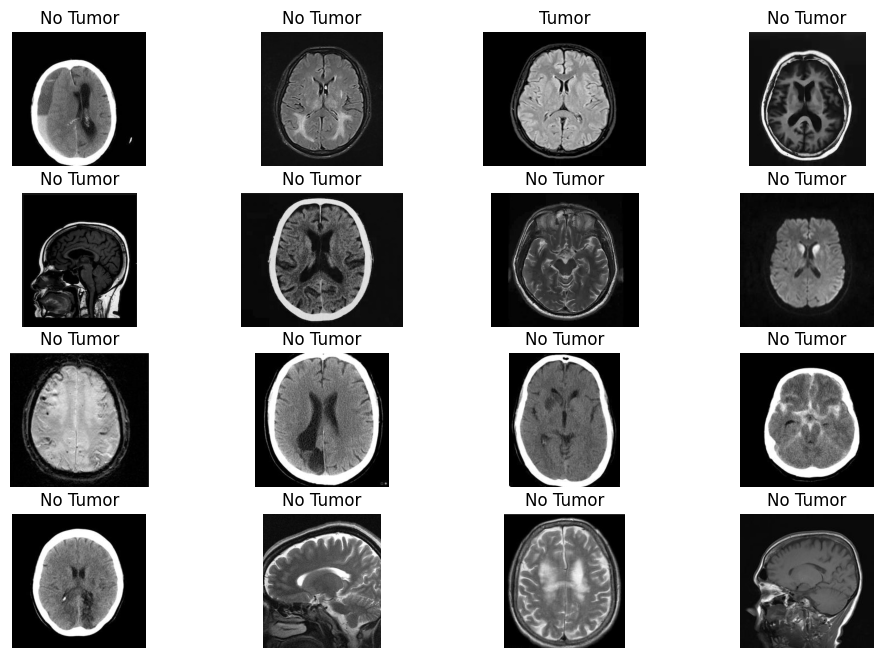

In [47]:
plt.figure(figsize=(12,8))
p = os.listdir('dataset/Testing/')
c=1
for i in os.listdir('dataset/Testing/no_tumor/')[:16]:
    plt.subplot(4,4,c)
    
    img = cv2.imread('dataset/Testing/no_tumor/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

Testing Pituitary Tumor

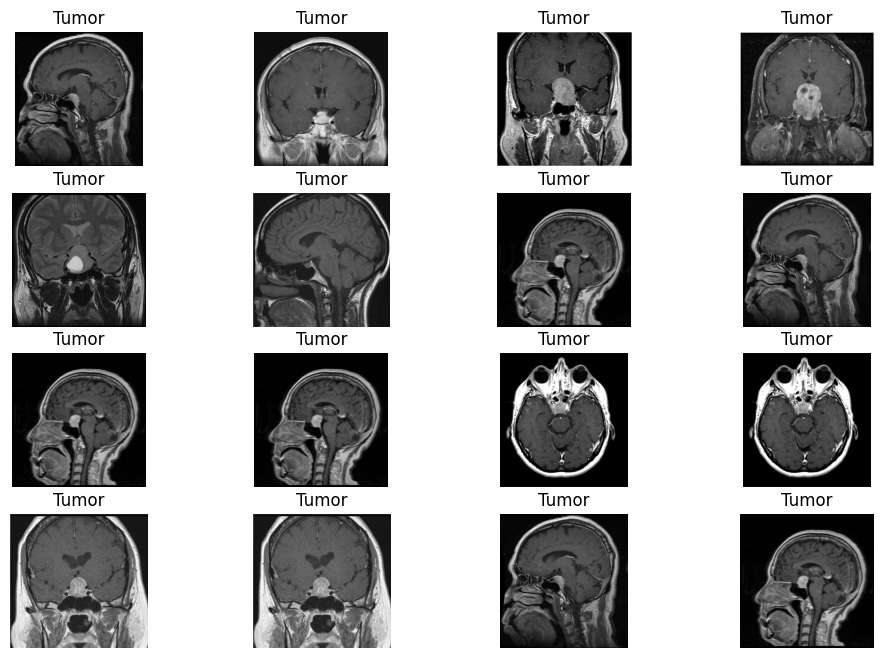

In [44]:
plt.figure(figsize=(12,8))
p = os.listdir('dataset/Testing/')
c=1
for i in os.listdir('dataset/Testing/pituitary_tumor/')[:16]:
    plt.subplot(4,4,c)
    
    img = cv2.imread('dataset/Testing/pituitary_tumor/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

Testing Glioma Tumor

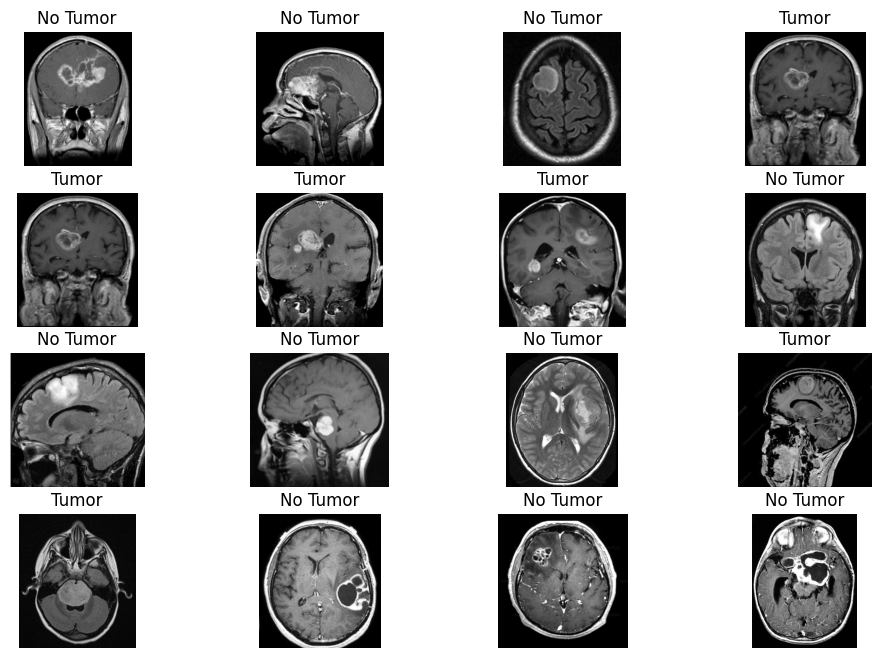

In [54]:
plt.figure(figsize=(12,8))
p = os.listdir('dataset/Testing/')
c=1
for i in os.listdir('dataset/Testing/glioma_tumor/')[:16]:
    plt.subplot(4,4,c)
    
    img = cv2.imread('dataset/Testing/glioma_tumor/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

Testing Meningioma Tumor

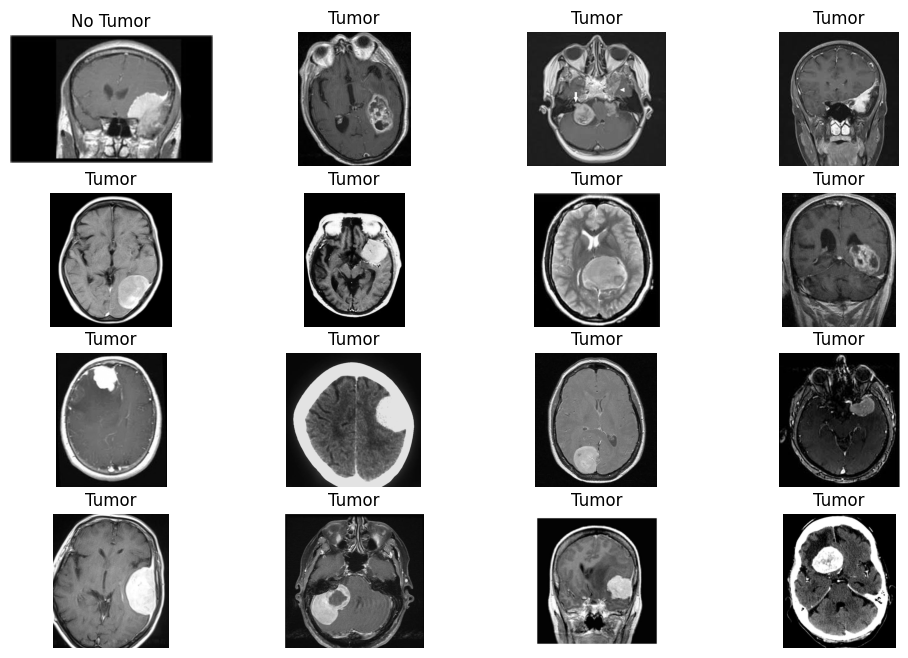

In [46]:
plt.figure(figsize=(12,8))
p = os.listdir('dataset/Testing/')
c=1
for i in os.listdir('dataset/Testing/meningioma_tumor/')[:16]:
    plt.subplot(4,4,c)
    
    img = cv2.imread('dataset/Testing/meningioma_tumor/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1